<a href="https://colab.research.google.com/github/rubanzasilva/mnist_basics/blob/main/mnist_full_ds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.9 MB/s eta 0:00:00
Mounted at /content/gdrive


In [ ]:
#hide
from fastai.vision.all import *
from fastbook import *
import numpy as np
import pandas as pd

matplotlib.rc('image', cmap='Greys')

In [ ]:
path = untar_data(URLs.MNIST)

In [ ]:
#hide
Path.BASE_PATH = path

In [ ]:
(path/'testing').ls()

(#10) [Path('testing/0'),Path('testing/3'),Path('testing/5'),Path('testing/9'),Path('testing/6'),Path('testing/2'),Path('testing/4'),Path('testing/7'),Path('testing/1'),Path('testing/8')]

In [ ]:
path.ls()

(#2) [Path('training'),Path('testing')]

As we see in the above dataset, there are folders of zeros,ones etc. using .sorted to ensure we get the same order of files

In [ ]:
#read in training digits
zeros = (path/'training/0').ls().sorted()
ones = (path/'training/1').ls().sorted()
twos = (path/'training/2').ls().sorted()
threes = (path/'training/3').ls().sorted()
fours = (path/'training/4').ls().sorted()
fives = (path/'training/5').ls().sorted()
sixes = (path/'training/6').ls().sorted()
sevens = (path/'training/7').ls().sorted()
eights = (path/'training/8').ls().sorted()
nines = (path/'training/9').ls().sorted()
nines

(#5949) [Path('training/9/10003.png'),Path('training/9/10004.png'),Path('training/9/10023.png'),Path('training/9/10028.png'),Path('training/9/10038.png'),Path('training/9/10043.png'),Path('training/9/10047.png'),Path('training/9/1005.png'),Path('training/9/10055.png'),Path('training/9/10059.png')...]

In [ ]:
im9 = Image.open(nines[5])
im9

In [ ]:
#read in test set digits
valid_zeros = (path/'testing/0').ls().sorted()
valid_ones = (path/'testing/1').ls().sorted()
valid_twos = (path/'testing/2').ls().sorted()
valid_threes = (path/'testing/3').ls().sorted()
valid_fours = (path/'testing/4').ls().sorted()
valid_fives = (path/'testing/5').ls().sorted()
valid_sixes = (path/'testing/6').ls().sorted()
valid_sevens = (path/'testing/7').ls().sorted()
valid_eights = (path/'testing/8').ls().sorted()
valid_nines = (path/'testing/9').ls().sorted()
valid_nines

(#1009) [Path('testing/9/1000.png'),Path('testing/9/1005.png'),Path('testing/9/1013.png'),Path('testing/9/104.png'),Path('testing/9/1045.png'),Path('testing/9/1048.png'),Path('testing/9/105.png'),Path('testing/9/1058.png'),Path('testing/9/1063.png'),Path('testing/9/108.png')...]

In [ ]:
Image.open(valid_eights[3])

In [ ]:
#image conversion to tensor
im9_tensor = tensor(im9)
im9_tensor

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  70, 140, 254, 254, 254, 1

In [ ]:
#convert all to tensor
zeros_tens =  [tensor(Image.open(o)) for o in zeros]
ones_tens = [tensor(Image.open(o)) for o in ones]
twos_tens = [tensor(Image.open(o)) for o in twos]
threes_tens = [tensor(Image.open(o)) for o in threes]
fours_tens = [tensor(Image.open(o)) for o in fours]
fives_tens = [tensor(Image.open(o)) for o in fives]
sixes_tens = [tensor(Image.open(o)) for o in sixes]
sevens_tens = [tensor(Image.open(o)) for o in sevens]
eights_tens = [tensor(Image.open(o)) for o in eights]
nines_tens = [tensor(Image.open(o)) for o in nines]


In [ ]:
#convert all to tensor
valid_zeros_tens =  [tensor(Image.open(o)) for o in valid_zeros]
valid_ones_tens = [tensor(Image.open(o)) for o in valid_ones]
valid_twos_tens = [tensor(Image.open(o)) for o in valid_twos]
valid_threes_tens = [tensor(Image.open(o)) for o in valid_threes]
valid_fours_tens = [tensor(Image.open(o)) for o in valid_fours]
valid_fives_tens = [tensor(Image.open(o)) for o in valid_fives]
valid_sixes_tens = [tensor(Image.open(o)) for o in valid_sixes]
valid_sevens_tens = [tensor(Image.open(o)) for o in valid_sevens]
valid_eights_tens = [tensor(Image.open(o)) for o in valid_eights]
valid_nines_tens = [tensor(Image.open(o)) for o in valid_nines]


<Axes: >

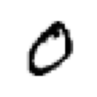

In [ ]:
show_image(zeros_tens[0])

In [ ]:
stacked_zeros = torch.stack(zeros_tens).float()/255
stacked_ones = torch.stack(ones_tens).float()/255
stacked_twos = torch.stack(twos_tens).float()/255
stacked_threes = torch.stack(threes_tens).float()/255
stacked_fours = torch.stack(fours_tens).float()/255
stacked_fives = torch.stack(fives_tens).float()/255
stacked_sixes = torch.stack(sixes_tens).float()/255
stacked_sevens = torch.stack(sevens_tens).float()/255
stacked_eights = torch.stack(eights_tens).float()/255
stacked_nines = torch.stack(nines_tens).float()/255

In [ ]:
valid_stacked_zeros = torch.stack(valid_zeros_tens).float()/255
valid_stacked_ones = torch.stack(valid_ones_tens).float()/255
valid_stacked_twos = torch.stack(valid_twos_tens).float()/255
valid_stacked_threes = torch.stack(valid_threes_tens).float()/255
valid_stacked_fours = torch.stack(valid_fours_tens).float()/255
valid_stacked_fives = torch.stack(valid_fives_tens).float()/255
valid_stacked_sixes = torch.stack(valid_sixes_tens).float()/255
valid_stacked_sevens = torch.stack(valid_sevens_tens).float()/255
valid_stacked_eights = torch.stack(valid_eights_tens).float()/255
valid_stacked_nines = torch.stack(valid_nines_tens).float()/255

In [ ]:
stacked_threes.shape

torch.Size([6131, 28, 28])

<Axes: >

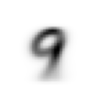

In [ ]:
#calculate mean3 for fun
mean9 = stacked_nines.mean(0)
show_image(mean9)

Mnist Loss Function

In [ ]:
train_x = torch.cat([stacked_zeros,stacked_ones,stacked_twos,stacked_threes,stacked_fours,stacked_fives,stacked_sixes,stacked_sevens,stacked_eights,stacked_nines]).view(-1, 28*28)

In [ ]:
train_y = tensor( [0]*len(zeros) + [1]*len(ones) + [2]*len(twos) + [3]*len(threes) + [4]*len(fours) + [5]*len(fives) + [6]*len(sixes) + [7]*len(sevens) + [8]*len(eights) + [9]*len(nines)).unsqueeze(1)

In [ ]:
train_x.shape,train_y.shape

(torch.Size([60000, 784]), torch.Size([60000, 1]))

In [ ]:
dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape,y

(torch.Size([784]), tensor([0]))

In [ ]:
dset = list(zip(train_x,train_y))
x,y = dset[5923]
x.shape,y

(torch.Size([784]), tensor([1]))

In [ ]:
len(zeros)

5923

The zip function aggregates the iterables you pass to it in this case train_x and train_y, hereby pairing the first value of train_x with the first value of train_y in a tuple and so on basically the image and label, x and y i.e. [(train_x[0],train_y[0]),(train_x[1],train_y[1])].

The list function then transforms this object(iterator) into a list.
We can then get the first item of this which would be the first pair.

Querying dset[1] up to dset[5922] will still return the value of y stacked as o because we have 5923 o values stacked up first in the tensor.

x,y = dset[5923] returns (torch.Size([784]), tensor([1])).



In [ ]:
valid_x = torch.cat([valid_stacked_zeros,valid_stacked_ones,valid_stacked_twos,valid_stacked_threes,valid_stacked_fours,valid_stacked_fives,valid_stacked_sixes,valid_stacked_sevens,valid_stacked_eights,valid_stacked_nines]).view(-1, 28*28)
valid_y = tensor( [0]*len(valid_zeros) + [1]*len(valid_ones) + [2]*len(valid_twos) + [3]*len(valid_threes) + [4]*len(valid_fours) + [5]*len(valid_fives) + [6]*len(valid_sixes) + [7]*len(valid_sevens) + [8]*len(valid_eights) + [9]*len(valid_nines)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

In [ ]:
#define linear model
def linear1(xb):
  return xb@weights + bias

In [ ]:
#Mnist loss function
def mnist_loss(predictions,targets):
  predictions = predictions.sigmoid()
  return torch.where(targets==1, 1-predictions, predictions).mean()

In [ ]:
#define function to Initialize parameters and return random parameters
#requires_grad tells PyTorch to track gradients when init_params is used

def init_params(size,std=1.0):
  return (torch.randn(size)*std).requires_grad_()

##Linear Model

1. Initialize parameters

In [ ]:
weights = init_params((28*28,1))

In [ ]:
bias = init_params(1)

Define data loader to do mini batch collation and shuffling

In [ ]:
dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [ ]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [ ]:
#mini batch
batch = train_x[:4]
batch

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [ ]:
label_batch = train_y[:4]
label_batch.shape

torch.Size([4, 1])

In [ ]:
preds = linear1(batch)
preds

tensor([[ -9.2751],
        [-23.0076],
        [-15.8010],
        [ -6.9643]], grad_fn=<AddBackward0>)

In [ ]:
loss = mnist_loss(preds,label_batch)
loss

tensor(0.0003, grad_fn=<MeanBackward0>)

In [ ]:
loss.backward()

In [ ]:
weights.grad.mean(),bias.grad

(tensor(4.4802e-05), tensor([0.0003]))

In [ ]:
corrects = (preds>0.0).float() == label_batch
corrects

tensor([[True],
        [True],
        [True],
        [True]])

In [ ]:
corrects.float().mean().item()

1.0

In [ ]:
def calc_grad(xb,yb,model):
  preds = model(xb)
  loss = mnist_loss(preds,yb)
  loss.backward()

In [ ]:
calc_grad(batch,label_batch,linear1)

In [ ]:
weights.grad.mean(),bias.grad

(tensor(8.9603e-05), tensor([0.0005]))

In [ ]:

#calculate grads second time
calc_grad(batch,label_batch,linear1)
weights.grad.mean(),bias.grad

(tensor(0.0001), tensor([0.0008]))

loss.backward adds the gradients of a loss to any gradients that are currently stored. So we have to set the current gradients to 0 first

In [ ]:
weights.grad.zero_(),bias.grad.zero_()

Stepping weights

When stepping the weights, we tell PyTorch not to keep track of the gradients. We do this by assigning a data attribute to the params.

Below is our basic training loop for an epoch

In [ ]:
def train_epoch(model,lr,params):
  for xb,yb in dl:
    calc_grad(xb,yb,model)
    for p in params:
      p.data -= p.grad*lr
      p.grad.zero_()

In [ ]:
(preds>0.0).float() == label_batch


tensor([[True],
        [True],
        [True],
        [True]])

In [ ]:
def batch_accuracy(xb,yb):
  preds = xb.sigmoid()
  corrects = (preds>0.5) == yb
  return corrects.float().mean()

In [ ]:
batch_accuracy(preds,label_batch)

tensor(1.)

In [ ]:
#put batches together
def validate_epoch(model):
  accs = [batch_accuracy(model(xb),yb) for xb,yb in valid_dl]
  return round(torch.stack(accs).mean().item(),4)

In [ ]:
validate_epoch(linear1)

0.092

We now have a starting point, lets train for another epoch to see if our model improves.

In [ ]:
lr = 1.
params = weights, bias
train_epoch(linear1,lr,params)
validate_epoch(linear1)

0.0958

In [ ]:
#do a few more
for i in range(20):
  train_epoch(linear1,lr,params)
  print(validate_epoch(linear1), end='')

0.09570.09570.09570.09570.09570.09570.09570.09570.09580.09580.09580.09580.0970.10070.10880.12660.15030.15950.1660.1706

##Using a PyTorch optimizer

Here we replace linear1 with nn.linear which does the same thing as init_params and linear1

In [ ]:
linear_model = nn.Linear(28*28,1)

In [ ]:
w,b = linear_model.parameters()
w.shape,b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [ ]:
class BasicOptim:
  def __init__(self,params,lr): self.params,self.lr = list(params),lr

  def step(self, *args, **kwargs):
    for p in self.params: p.data -= p.grad.data * self.lr

  def zero_grad(self, *args, **kwargs):
    for p in self.params: p.grad = None


In [ ]:
opt = BasicOptim(linear_model.parameters(), lr)

In [ ]:
#with this, we can redefine train_epoch
def train_epoch(model):
  for xb, yb in dl:
    calc_grad(xb,yb,model)
    opt.step()
    opt.zero_grad()

fastai provides an SGD class which by default does the same thing as BasicOptim

In [ ]:
opt = SGD(linear_model.parameters(),lr)

In [ ]:
def train_model(model,epochs):
  for i in range(epochs):
    train_epoch(model)
    print(validate_epoch(model), end=' ')

In [ ]:
train_model(linear_model,20)

0.0957 0.1033 0.1172 0.1261 0.1322 0.1379 0.1427 0.1474 0.1523 0.1562 0.1594 0.162 0.1642 0.1669 0.1692 0.1715 0.1729 0.1746 0.1767 0.1773 

fastai also provides Learner.fit which we can use instead of train_model.To create a Learner, first we must create a DataLoaders object by passing in the training and validation **DataLoader**'s object.

In [ ]:
dls = DataLoaders(dl, valid_dl)

  To create a Learner without using an application such as Tabular Learner, we need to pass in all the objects that we created above i.e. the model, loss function, DataLoaders, optimzation function which is passed the parameters and any metrics that we might be using.

In [ ]:
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)

In [ ]:
learn.fit(30, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.003687,0.103845,0.098100,00:00
1,0.001804,0.093277,0.107400,00:00
2,0.001693,0.085595,0.121800,00:00
3,0.001710,0.079647,0.129700,00:00
4,0.001764,0.074572,0.136500,00:00
5,0.001832,0.070107,0.141600,00:00
6,0.001904,0.066110,0.146400,00:00
7,0.001978,0.062476,0.151200,00:02
8,0.002050,0.059136,0.156000,00:01
9,0.002119,0.056052,0.159600,00:00


##Neural Network
To turn the above linear classifier into a neural network, we add a non-linear function between two linear layers i.e. a ReLu

In [ ]:
def simple_net(xb):
  res = xb@w1 + b1
  res = res.max(tensor(0.0))
  res = xb@w2 + b2
  return res


In [ ]:
w1 = init_params(28*28,30)
b1 = init_params(30)
w2 = init_params(30,10)
b2 = init_params(10)

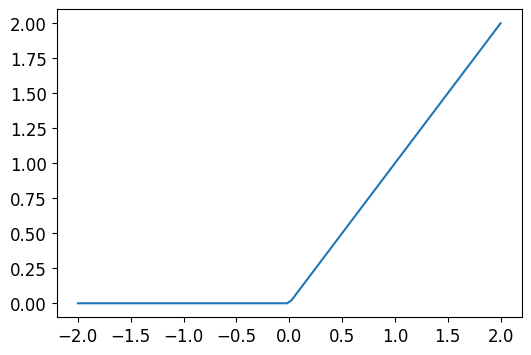

In [ ]:
#ReLU replaces every negative number with a 0.
plot_function(F.relu)

In [ ]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,10)
)

In [ ]:
learn = Learner(dls,simple_net,opt_func=SGD,loss_func=mnist_loss,metrics=batch_accuracy)

In [ ]:
learn.fit(10,0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.019993,0.111963,0.098000,00:01
1,0.015152,0.103872,0.098000,00:01
2,0.012375,0.083043,0.117770,00:01
3,0.009623,0.064543,0.153670,00:00
4,0.008464,0.052453,0.170460,00:01
5,0.007946,0.044486,0.179460,00:01
6,0.007655,0.038909,0.184450,00:01
7,0.007462,0.034808,0.188780,00:01
8,0.007317,0.031683,0.191800,00:00
9,0.007199,0.029227,0.193100,00:00


In [ ]:
SGD

<function fastai.optimizer.SGD(params: 'Tensor | Iterable', lr: 'float | slice', mom: 'float' = 0.0, wd: 'Real' = 0.0, decouple_wd: 'bool' = True) -> 'Optimizer'>

New loss function for multi-class classification

- change sigmoid to softmax


Use softmax function + negative log likelihood (crossEntropyLoss), replace Sigmoid (BinaryCrossEntropy)


activations

Lets create a neural network that predicts 3's and 7's and returns two activations , one for each class.

Assuming we have 6 images and 2 possible categories one for the the 3's which are represented by the 1st column and another for the 7's which are represented by the 2nd column.For this example, we use random numbers with a standard deviation of 2 meaning we multiply randn by 2.

In [ ]:
#hide
torch.random.manual_seed(42);

In [ ]:
acts = torch.randn((6,2))*2
acts

tensor([[ 0.6734,  0.2576],
        [ 0.4689,  0.4607],
        [-2.2457, -0.3727],
        [ 4.4164, -1.2760],
        [ 0.9233,  0.5347],
        [ 1.0698,  1.6187]])

  So we see that we have 6 mnist digits and they have 6 activations in the first column for the how much our model thinks a number is a three and vice versa,

In [ ]:
acts.sigmoid()

tensor([[0.6623, 0.5641],
        [0.6151, 0.6132],
        [0.0957, 0.4079],
        [0.9881, 0.2182],
        [0.7157, 0.6306],
        [0.7446, 0.8346]])

If we take the sigmoid of this, we get rows that dont add up to 1 but we want the probabilty of a number being a 3 and 7 to add up to 1.

In <<chapter_mnist_basics>>, our neural net created a single activation per image, which we passed through the sigmoid function. That single activation represented the model's confidence that the input was a 3. Binary problems are a special case of classification problems, because the target can be treated as a single boolean value, as we did in mnist_loss. But binary problems can also be thought of in the context of the more general group of classifiers with any number of categories: in this case, we happen to have two categories. As we saw in the bear classifier, our neural net will return one activation per category.

So in the binary case, what do those activations really indicate? A single pair of activations simply indicates the relative confidence of the input being a 3 versus being a 7. The overall values, whether they are both high, or both low, don't matter—all that matters is which is higher, and by how much.

We would expect that since this is just another way of representing the same problem, that we would be able to use sigmoid directly on the two-activation version of our neural net. And indeed we can! We can just take the difference between the neural net activations, because that reflects how much more sure we are of the input being a 3 than a 7, and then take the sigmoid of that:

In [ ]:
(acts[:,0]-acts[:,1]).sigmoid()

tensor([0.6025, 0.5021, 0.1332, 0.9966, 0.5959, 0.3661])

What we do is take the difference between the probability of a number being a 3 and that of it being a 7 and call it the probability that a number is a 3 and take the sigmoid of that, which gives us a single number betweeb 0 and 1.

In [ ]:
diff = (acts[:,0]-acts[:,1])
diff

tensor([ 0.4158,  0.0083, -1.8731,  5.6924,  0.3886, -0.5489])

In [ ]:
diff.sigmoid()

tensor([0.6025, 0.5021, 0.1332, 0.9966, 0.5959, 0.3661])

But remember we want two columns one representing the probabilty of a number being a 3 and the other being the probability of a number being a 7.

We can do that by making index 0 the sigmoid and index 1 the difference of that from 1 and the best thing is all these add up to 1.

In [ ]:
torch.stack([diff.sigmoid(),1-diff.sigmoid()], dim=1)

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

With this we go from having 2 columns with activations to 2 columns with probabilities for being a 3 and a 7 respectively that add up to 1.

The next question would be how do we extend this to more than 2 digits.We can do this by using the softmax function

Softmax

In [ ]:
def softmax(x):
  return exp(x)/exp(x).sum(dim=1, keepdim=True)

In [ ]:
sm_acts = torch.softmax(acts, dim=1)
sm_acts


tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

softmax gives you identical results for the binary case as sigmoid probabilities we just calculated but in the multi category case we end up with something where we have 10 activations for all the digits say if we were using the 10 digits in the full mnist dataset which results in probabilites for all the digits which all individually sum up one.

To do that in practice, you can just call **torch.softmax**.

"build using sigmoid function, then build using softmax and compare results with the expectation being that softmax results in better and faster training + better performing and robust model because it is able to learn better"

pytorch extends softmax with torch.softmax


```
def mnist_loss(predictions,targets):
    predictions = predictions.sigmoid()
    return torch.where(targets == 1, 1 - predictions, predictions).mean()
```





In our originial mnist_basics, we used mnist_loss as our loss function where we took the sigmoid and got the difference of the input from 1 and the original input and took the mean as our loss.

For multi class digit classification, we can do exaclty the same while updating the function to handle multiple inputs, meaning we would have to substitute our torch.where as this only works on binary inputs.

For example in our 2 digit classifier the targets were either 0 or 1 but in the full dataset with 10 digits, targets could be anywhere from 0 to 10.

We replace torch.where() with indexing. Lets do this with an example for our binary classification problem of 2 digits.

First lets define some targets for our 6 images.


In [ ]:
targ = tensor([0,1,0,1,1,0])

In [ ]:
#our previosuly defined activations
sm_acts

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

In [ ]:
idx = range(6)
sm_acts[idx, targ]

tensor([0.6025, 0.4979, 0.1332, 0.0034, 0.4041, 0.3661])

idx grabs all the numbers from 0 to 5.

So we see that here for the row where we our target was 0 (a digit 3), our index returned the probability of the number being a 3 from our sm_scts and vice versa.

The 1st argument says which rows should you return and the 2nd argument specifies for each of those rows, which column should you return.
Turns out this is identical to torch.where for our binary classification problem.

In [ ]:
#hide_input
from IPython.display import HTML
df = pd.DataFrame(sm_acts, columns=["3","7"])
df['targ'] = targ
df['idx'] = idx
df['loss'] = sm_acts[range(6), targ]
t = df.style.hide_index()
#To have html code compatible with our script
html = t._repr_html_().split('</style')[1]
html = re.sub(r'<table id="([^"]+)"\s*>', r'<table>', html)
display(HTML(html))

<ipython-input-26-1fb15e3eb3ce>:7: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  t = df.style.hide_index()


3,7,targ,idx,loss
0.602469,0.397531,0,0,0.602469
0.502065,0.497935,1,1,0.497935
0.133188,0.866811,0,2,0.133188
0.996640,0.003360,1,3,0.003360
0.595949,0.404051,1,4,0.404051
0.366118,0.633882,0,5,0.366118


In [ ]:
full_acts = torch.randn((3,10))*2
full_acts

tensor([[ 1.2815e+00,  1.1665e+00,  2.1339e+00, -9.0031e-01, -1.3575e+00,  1.1486e+00,  3.7550e-01, -7.1525e-01,  5.2982e-01,  2.5463e+00],
        [-2.6217e-03, -6.0721e-01, -1.9729e+00,  2.4660e-01, -2.8728e+00, -2.2597e+00, -2.7207e-01,  3.2708e+00,  1.3095e+00,  1.1520e+00],
        [-7.2182e-01, -1.2118e-01, -3.6116e+00,  1.8509e+00, -7.5069e-01,  2.0662e+00, -1.3733e+00,  1.2736e+00,  4.3511e-01, -9.3310e-02]])

In [ ]:
full_sm_acts = torch.softmax(full_acts, dim=1)
full_sm_acts


tensor([[0.1015, 0.0905, 0.2381, 0.0115, 0.0073, 0.0889, 0.0410, 0.0138, 0.0479, 0.3596],
        [0.0269, 0.0147, 0.0037, 0.0345, 0.0015, 0.0028, 0.0205, 0.7101, 0.0999, 0.0853],
        [0.0217, 0.0395, 0.0012, 0.2840, 0.0211, 0.3522, 0.0113, 0.1594, 0.0689, 0.0406]])

In [ ]:
full_targ = tensor([0,1,4])

In [ ]:
full_idx = range(3)
full_sm_acts[full_idx, full_targ]

tensor([0.1015, 0.0147, 0.0211])

In [ ]:
#hide_input
from IPython.display import HTML
df = pd.DataFrame(full_sm_acts, columns=["0","1","2","3","4","5","6","7","8","9"])
df['full_targ'] = full_targ
df['full_idx'] = full_idx
df['full_loss'] = full_sm_acts[range(3), full_targ]
t = df.style.hide_index()
#To have html code compatible with our script
html = t._repr_html_().split('</style')[1]
html = re.sub(r'<table id="([^"]+)"\s*>', r'<table>', html)
display(HTML(html))

<ipython-input-41-92a8e2ec2099>:7: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  t = df.style.hide_index()


0,1,2,3,4,5,6,7,8,9,full_targ,full_idx,full_loss
0.101520,0.090490,0.238078,0.011455,0.007252,0.088888,0.041028,0.013784,0.047874,0.359632,0,0,0.101520
0.026894,0.014692,0.003750,0.034506,0.001525,0.002815,0.020542,0.710061,0.099884,0.085331,1,1,0.014692
0.021677,0.039524,0.001205,0.283992,0.021060,0.352219,0.011300,0.159446,0.068936,0.040641,4,2,0.021060


In [ ]:
-full_sm_acts[full_idx, full_targ]

tensor([-0.1015, -0.0147, -0.0211])

We negate this. why ?

https://youtu.be/p50s63nPq9I?si=Xq0WwpLkseIZ24mY&t=6670

In [ ]:

F.nll_loss(full_sm_acts, full_targ, reduction='none')

tensor([-0.1015, -0.0147, -0.0211])

To make this better, we taje the log.

If we take mean of the log of the results of our probabilities ( -full_sm_acts[full_idx, full_targ] ) we get the negative loss likelihood.

When we take the softmax, and the loss likelihood, we get cross entropy loss.PyTorch has a module for this nn.CrossEntropyLoss() which in practice takes log_softmax the cross entropy loss and passes it to nll_loss.

In [ ]:
loss_func = nn.CrossEntropyLoss()

In [ ]:
loss_func(full_acts,full_targ)

tensor(3.4561)

PyTorch provides loss funtions in 2 forms the class form above and the plain funtional form

In [ ]:
F.cross_entropy(full_acts,full_targ)

tensor(3.4561)

remember to check, all probabilities for each row should add up to 1 for example
0.101520 +	0.090490 +	0.238078	+ 0.011455	+ 0.007252 +	0.088888	+ 0.041028	+ 0.013784 +	0.047874	+ 0.359632 = 1

#to do 3
recreate mnist loss function wit sigmoid

In [ ]:
#for the full mnsit dataset with targ refined redefined
#loss_func(full_acts, train_y) or
#loss_func(train_x, train_y)


TypeError: softmax() received an invalid combination of arguments - got (Tensor), but expected one of:
 * (Tensor input, int dim, torch.dtype dtype, *, Tensor out)
 * (Tensor input, name dim, *, torch.dtype dtype)


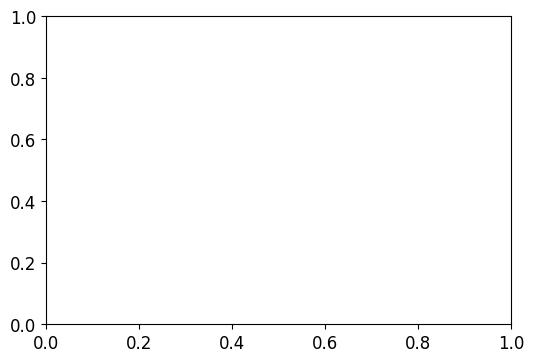

In [ ]:
plot_function(torch.softmax, title='Sigmoid', min=-4, max=4)

In [ ]:
# Define the plot_function
def plot_function(f, tx, ty, title, min, max, figsize):
    x = torch.linspace(min,max, 100)
    fig,ax = plt.subplots(figsize=figsize)
    ax.plot(x,f(x))
    if tx is not None: ax.set_xlabel(tx)
    if ty is not None: ax.set_ylabel(ty)
    ax.set_title(title)
    plt.show()


In [ ]:
plot_function(torch.softmax, title='sigmoid', min=-4, max=4)

TypeError: plot_function() missing 3 required positional arguments: 'tx', 'ty', and 'figsize'

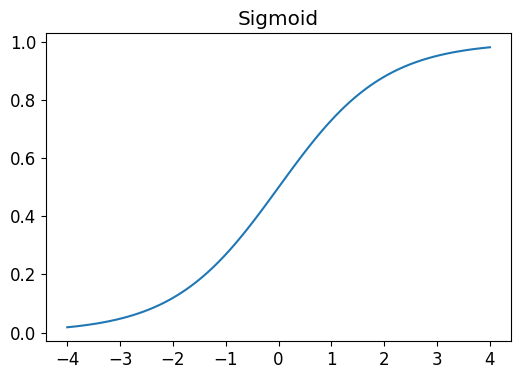

In [ ]:
plot_function(torch.sigmoid, title='Sigmoid', min=-4, max=4)